# Covid 19

# Imports

In [1]:
import os
import requests
import numpy as np
import pandas as pd
from datetime import datetime
from tqdm.notebook import tqdm

# seaborn
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.core.display import display, HTML

# plotly
from plotly import tools, subplots
import plotly.graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
import plotly.io as pio
pio.templates.default = "plotly_dark"

## Import Data

In [2]:
for dirname, _, filenames in os.walk('../data/CSSEGIS'):
    filenames.sort()
    for filename in filenames:
        print(os.path.join(dirname, filename))

../data/CSSEGIS\time_series_covid19_confirmed_Us.csv
../data/CSSEGIS\time_series_covid19_confirmed_global.csv
../data/CSSEGIS\time_series_covid19_deaths_US.csv
../data/CSSEGIS\time_series_covid19_deaths_global.csv
../data/CSSEGIS\time_series_covid19_recovered_global.csv


In [3]:
#%% time
# Download from Github

for filename in [
    'time_series_covid19_confirmed_global.csv',
    'time_series_covid19_deaths_global.csv',
    'time_series_covid19_recovered_global.csv',
    'time_series_covid19_confirmed_US.csv',
    'time_series_covid19_deaths_US.csv',
]:
    print(f'Downloading {filename}')
    url = f'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/{filename}'
    myfile = requests.get(url)
    name_path = '../data/CSSEGIS/'
    open(''.join([name_path, filename]), 'wb').write(myfile.content)

In [4]:
df_conf_global = pd.read_csv('../data/CSSEGIS/time_series_covid19_confirmed_global.csv')
df_conf_global.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  10/29/20  10/30/20  10/31/20  \
0        0        0        0        0  ...     41268     41334     41425   
1        0        0        0        0  ...     20315     20634     20875   
2        0        0        0        0  ...     57332     57651     57942   
3        0        0        0        0  ...      4567      4665      4756   
4        0        0        0        0  ...     10269     10558     10805   

   11/1/20  11/2/20  11/3/20  11/4/20  11/5/20  11/6/20  11/7/20  
0    41501    41633    41728    41814    41935    41975    42033  
1    21202    21523    21904    22300    22721    23210    23705  
2    58272    58574    58979    59527    60169    60800    61381  
3     4825     4888     4910     5045     5135     5135     5319  
4    11035    11228    11577    11813    12102    12223    12335  

[5 rows x 295 columns]

In [5]:
df_death_global = pd.read_csv('../data/CSSEGIS/time_series_covid19_deaths_global.csv')
df_death_global.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  10/29/20  10/30/20  10/31/20  \
0        0        0        0        0  ...      1532      1533      1536   
1        0        0        0        0  ...       499       502       509   
2        0        0        0        0  ...      1949      1956      1964   
3        0        0        0        0  ...        73        75        75   
4        0        0        0        0  ...       275       279       284   

   11/1/20  11/2/20  11/3/20  11/4/20  11/5/20  11/6/20  11/7/20  
0     1536     1541     1544     1548     1554     1554     1556  
1      518      527      532      536      543      549      557  
2     1973     1980     1980     1999     2011     2024     2036  
3       75       75       75       75       75       75       75  
4      286      289      291      296      299      300      303  

[5 rows x 295 columns]

In [6]:
df_recov_global = pd.read_csv('../data/CSSEGIS/time_series_covid19_recovered_global.csv')
df_recov_global.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  10/29/20  10/30/20  10/31/20  \
0        0        0        0        0  ...     34239     34258     34321   
1        0        0        0        0  ...     11007     11097     11189   
2        0        0        0        0  ...     39635     40014     40201   
3        0        0        0        0  ...      3260      3377      3475   
4        0        0        0        0  ...      3736      4107      4523   

   11/1/20  11/2/20  11/3/20  11/4/20  11/5/20  11/6/20  11/7/20  
0    34326    34342    34355    34362    34440    34440    34446  
1    11246    11367    11473    11578    11696    11861    12002  
2    40395    40577    40577    41001    41244    41510    41783  
3     3475     3548     3627     3734     3858     3858     4043  
4     4920     5172     5230     5266     5350     5626     5647  

[5 rows x 295 columns]

# Prepare Data

In [7]:
def _convert_date_str(df: pd.DataFrame):
    """
    """
    try:
        df.columns = list(df.columns[:4]) + [datetime.strptime(d, "%m/%d/%y").date().strftime("%Y-%m-%d") for d in df.columns[4:]]
    except:
        print('_convert_date_str failed with %y, try %Y')
        df.columns = list(df.columns[:4]) + [datetime.strptime(d, "%m/%d/%Y").date().strftime("%Y-%m-%d") for d in df.columns[4:]]

def _rename_columns(df: pd.DataFrame):
    """
    """
    df.rename(columns={'Province/State': 'Province_State', 'Country/Region': 'Country_Region'}, inplace=True)

def remove_states(df: pd.DataFrame):
    """
    """
    removed_states = "Recovered|Grand Princess|Diamond Princess"
    return df[~df['Province_State'].replace(np.nan, "nan").str.match(removed_states)]

def remove_countries(df: pd.DataFrame):
    """
    """
    removed_countries = "US|The West Bank and Gaza"
    return df[~df['Country_Region'].replace(np.nan, 'nan').str.match(removed_countries)]

def melt_date(df: pd.DataFrame, value_name: str):
    """
    """
    return df.melt(id_vars=['Country_Region', 'Province_State', 'Lat', 'Long'], value_vars=df.columns[4:],
        var_name='Date', value_name=value_name)

def create_train(df_conf: pd.DataFrame, df_death: pd.DataFrame, df_recov: pd.DataFrame):
    """
    """
    train = df_conf.merge(df_death, on=['Country_Region', 'Province_State', 'Lat', 'Long', 'Date'])
    return train.merge(df_recov, on=['Country_Region', 'Province_State', 'Lat', 'Long', 'Date'])

## World

In [8]:
_convert_date_str(df_conf_global)
_convert_date_str(df_death_global)
_convert_date_str(df_recov_global)

In [9]:
df_conf_global.head()

Province/State Country/Region       Lat       Long  2020-01-22  2020-01-23  \
0            NaN    Afghanistan  33.93911  67.709953           0           0   
1            NaN        Albania  41.15330  20.168300           0           0   
2            NaN        Algeria  28.03390   1.659600           0           0   
3            NaN        Andorra  42.50630   1.521800           0           0   
4            NaN         Angola -11.20270  17.873900           0           0   

   2020-01-24  2020-01-25  2020-01-26  2020-01-27  ...  2020-10-29  \
0           0           0           0           0  ...       41268   
1           0           0           0           0  ...       20315   
2           0           0           0           0  ...       57332   
3           0           0           0           0  ...        4567   
4           0           0           0           0  ...       10269   

   2020-10-30  2020-10-31  2020-11-01  2020-11-02  2020-11-03  2020-11-04  \
0       41334       41425       41501       41633       41728       41814   
1       20634       20875       21202       21523       21904       22300   
2       57651       57942       58272       58574       58979       59527   
3        4665        4756        4825        4888        4910        5045   
4       10558       10805       11035       11228       11577       11813   

   2020-11-05  2020-11-06  2020-11-07  
0       41935       41975       42033  
1       22721       23210       23705  
2       60169       60800       61381  
3        5135        5135        5319  
4       12102       12223       12335  

[5 rows x 295 columns]

In [10]:
_rename_columns(df_conf_global)
_rename_columns(df_death_global)
_rename_columns(df_recov_global)

In [11]:
df_conf_global = remove_states(df_conf_global)
df_death_global = remove_states(df_death_global)
df_recov_global = remove_states(df_recov_global)

In [12]:
df_conf_global = remove_countries(df_conf_global)
df_death_global = remove_countries(df_death_global)
df_recov_global = remove_countries(df_recov_global)

In [13]:
df_conf_global_melt = melt_date(df_conf_global, 'ConfirmedCases')
df_death_global_melt = melt_date(df_death_global, 'Deaths')
df_recov_global_melt = melt_date(df_recov_global, 'Recovered')

In [14]:
df_conf_global_melt.head(3)

Country_Region Province_State       Lat       Long        Date  \
0    Afghanistan            NaN  33.93911  67.709953  2020-01-22   
1        Albania            NaN  41.15330  20.168300  2020-01-22   
2        Algeria            NaN  28.03390   1.659600  2020-01-22   

   ConfirmedCases  
0               0  
1               0  
2               0

In [15]:
df_death_global_melt.head(3)

Country_Region Province_State       Lat       Long        Date  Deaths
0    Afghanistan            NaN  33.93911  67.709953  2020-01-22       0
1        Albania            NaN  41.15330  20.168300  2020-01-22       0
2        Algeria            NaN  28.03390   1.659600  2020-01-22       0

In [16]:
df_recov_global_melt.head(3)

Country_Region Province_State       Lat       Long        Date  Recovered
0    Afghanistan            NaN  33.93911  67.709953  2020-01-22          0
1        Albania            NaN  41.15330  20.168300  2020-01-22          0
2        Algeria            NaN  28.03390   1.659600  2020-01-22          0

In [17]:
train = create_train(df_conf_global_melt, df_death_global_melt, df_recov_global_melt)

## US

In [18]:
df_conf_us = pd.read_csv('../data/CSSEGIS/time_series_covid19_confirmed_Us.csv')
df_death_us = pd.read_csv('../data/CSSEGIS/time_series_covid19_deaths_US.csv')

In [19]:
def _drop_columns(df: pd.DataFrame, drop_pop: bool=False):
    """
    """
    df.drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Combined_Key'], inplace=True, axis=1)
    if drop_pop:
        df.drop(['Population'], inplace=True, axis=1)

def _rename_long(df: pd.DataFrame):
    """
    """
    df.rename({'Long_': 'Long'}, axis=1, inplace=True)

def clean_df_us(df: pd.DataFrame):
    """
    """
    return df[~df.Province_State.str.match("Diamond Princess|Grand Princess|Recovered|Northern Mariana Islands|American Samoa")]

def agg_by_province(df: pd.DataFrame):
    """
    """
    return df.groupby(['Country_Region', 'Province_State']).sum().reset_index()

def _remove_lat_long(df: pd.DataFrame):
    """
    """
    df.drop(['Lat', 'Long'], inplace=True, axis=1)

def melt_date_us(df: pd.DataFrame, val_name: str):
    """
    """
    return df.melt(id_vars=['Country_Region', 'Province_State'], value_vars=df.columns[2:],
        var_name='Date', value_name=val_name)

def create_train_us(df_conf: pd.DataFrame, df_death: pd.DataFrame):
    """
    """
    return df_conf.merge(df_death, on=['Country_Region', 'Province_State', 'Date'])

In [20]:
_drop_columns(df_conf_us, drop_pop=False)
_drop_columns(df_death_us, drop_pop=True)

In [21]:
_rename_long(df_conf_us)
_rename_long(df_death_us)

In [22]:
_convert_date_str(df_conf_us)
_convert_date_str(df_death_us)

In [23]:
df_conf_us = clean_df_us(df_conf_us)
df_death_us = clean_df_us(df_death_us)

In [24]:
df_conf_us = agg_by_province(df_conf_us)
df_death_us = agg_by_province(df_death_us)

In [25]:
_remove_lat_long(df_conf_us)
_remove_lat_long(df_death_us)

In [26]:
df_conf_us = melt_date_us(df_conf_us, val_name='ConfirmedCases')
df_death_us = melt_date_us(df_death_us, val_name='Deaths')

In [27]:
df_conf_us

Country_Region Province_State        Date  ConfirmedCases
0                 US        Alabama  2020-01-22               0
1                 US         Alaska  2020-01-22               0
2                 US        Arizona  2020-01-22               0
3                 US       Arkansas  2020-01-22               0
4                 US     California  2020-01-22               0
...              ...            ...         ...             ...
15709             US       Virginia  2020-11-07          190873
15710             US     Washington  2020-11-07          116011
15711             US  West Virginia  2020-11-07           27609
15712             US      Wisconsin  2020-11-07          263130
15713             US        Wyoming  2020-11-07           16597

[15714 rows x 4 columns]

In [28]:
train_us = create_train_us(df_conf_us, df_death_us)

# Aggregate all

In [29]:
# Functions

def _rename_train_col(train: pd.DataFrame, id_recov: bool=False):
    """
    """
    train.rename({'Country_Region': 'country', 'Province_State': 'province', 'Date': 'date',
        'ConfirmedCases': 'confirmed', 'Deaths': 'fatalities'}, axis=1, inplace=True)
    if id_recov:
        train.rename({'Id': 'id', 'Recovered': 'recovered'}, axis=1, inplace=True)

def update_country(train: pd.DataFrame):
    """
    """
    train['country_province'] = train['country'].fillna('') + '/' + train['province'].fillna('')
    return train

In [30]:
train = pd.concat([train, train_us], axis=0, sort=False)
_rename_train_col(train_us, id_recov=False)
train_us = update_country(train_us)

In [31]:
_rename_train_col(train, id_recov=True)
train = update_country(train)

# Worldwide trend

In [32]:
# Function

def create_ww_df(df: pd.DataFrame):
    """
    """
    df_ww = df.groupby('date')[['confirmed', 'fatalities']].sum().reset_index()
    df_ww['new_case'] = df_ww['confirmed'] - df_ww['confirmed'].shift(1)
    df_ww['growth_factor'] = df_ww['new_case'] / df_ww['new_case'].shift(1)
    return df_ww

def create_ww_melt(df: pd.DataFrame):
    """
    """
    return pd.melt(df, id_vars=['date'], value_vars=['confirmed', 'fatalities', 'new_case'])

def calc_mortality(df: pd.DataFrame):
    """
    """
    df['mortality'] = df['fatalities'] / df['confirmed']
    return df

In [33]:
df_ww = create_ww_df(train)
df_ww.head()

date  confirmed  fatalities  new_case  growth_factor
0  2020-01-22        549          17       NaN            NaN
1  2020-01-23        648          17      99.0            NaN
2  2020-01-24        930          25     282.0       2.848485
3  2020-01-25       1394          41     464.0       1.645390
4  2020-01-26       2021          54     627.0       1.351293

In [34]:
df_ww_melt = create_ww_melt(df_ww)

In [35]:
df_ww_melt

date   variable     value
0    2020-01-22  confirmed     549.0
1    2020-01-23  confirmed     648.0
2    2020-01-24  confirmed     930.0
3    2020-01-25  confirmed    1394.0
4    2020-01-26  confirmed    2021.0
..          ...        ...       ...
868  2020-11-03   new_case  477162.0
869  2020-11-04   new_case  594571.0
870  2020-11-05   new_case  586443.0
871  2020-11-06   new_case  637176.0
872  2020-11-07   new_case  505365.0

[873 rows x 3 columns]

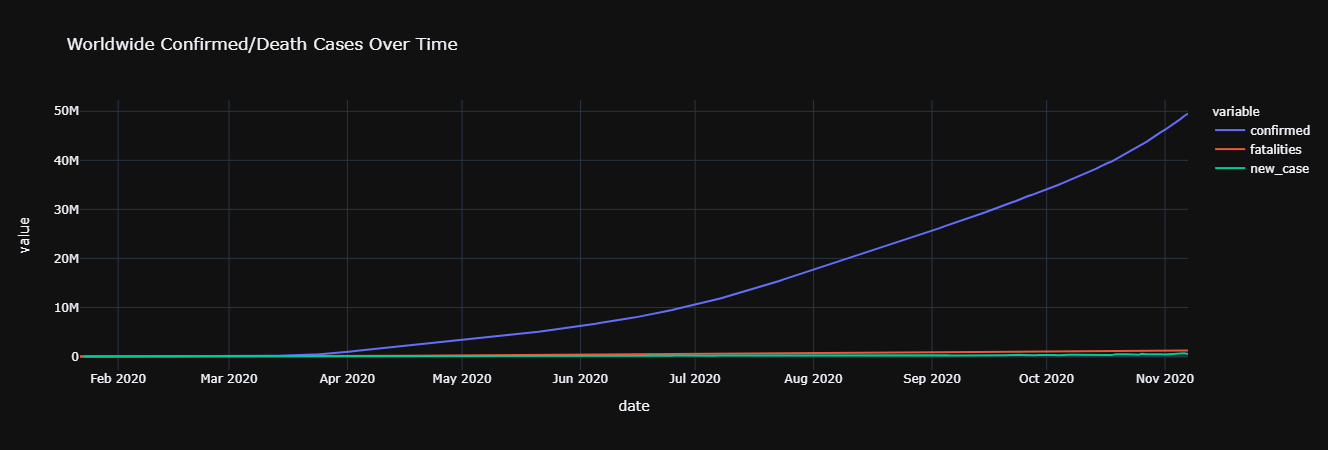

In [36]:
fig = px.line(df_ww_melt, x='date', y='value', color='variable',
   title='Worldwide Confirmed/Death Cases Over Time')
fig.show()
# fig, ax = plt.subplots(figsize=(18, 9))
# sns.lineplot(x='date', y='value', hue='variable',
#     ax=ax,
#     data=df_ww_melt)
# plt.title('Worldwide Confirmed/Death Cases Over Time',)

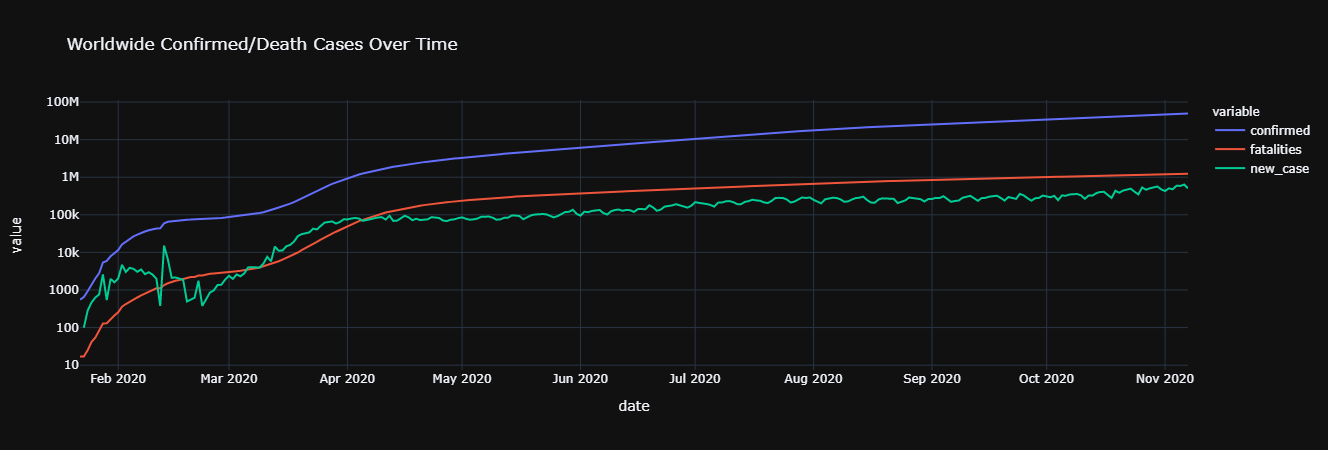

In [37]:
fig = px.line(df_ww_melt, x='date', y='value', color='variable',
    title='Worldwide Confirmed/Death Cases Over Time',
    log_y=True,
)
fig.show()

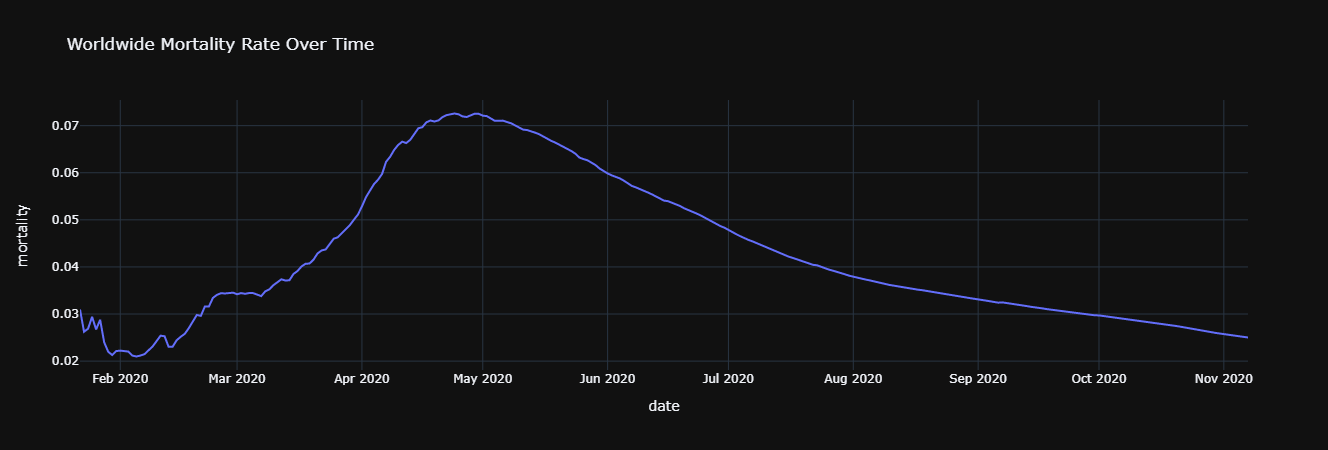

In [38]:
df_ww = calc_mortality(df_ww)
fig = px.line(df_ww, x='date', y='mortality',
   title='Worldwide Mortality Rate Over Time')
fig.show()

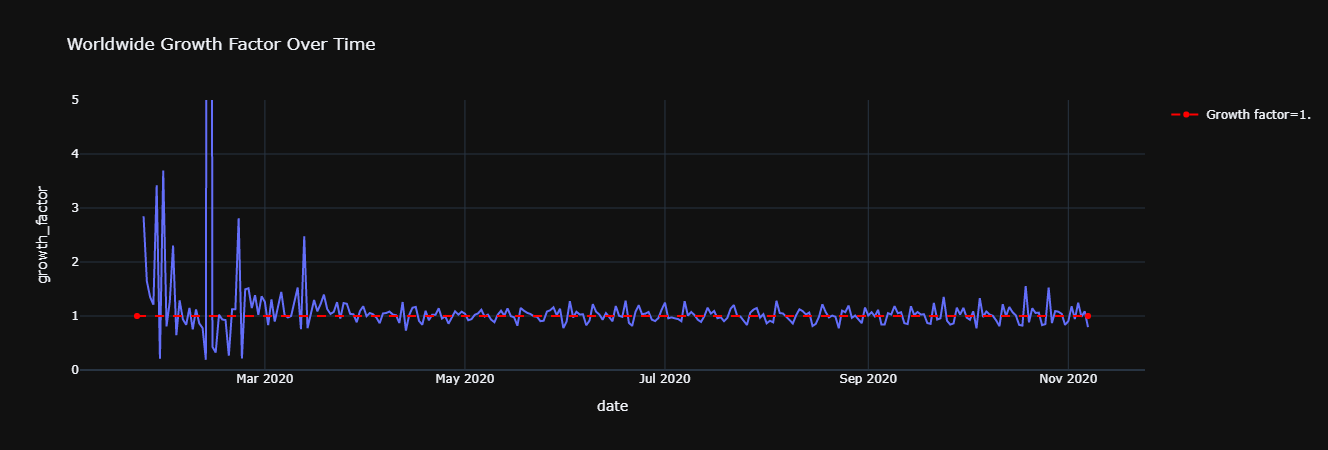

In [39]:
fig = px.line(df_ww, x="date", y="growth_factor", 
    title="Worldwide Growth Factor Over Time")
fig.add_trace(go.Scatter(x=[df_ww['date'].min(), df_ww['date'].max()], y=[1., 1.], name='Growth factor=1.', line=dict(dash='dash', color=('rgb(255, 0, 0)'))))
fig.update_yaxes(range=[0., 5.])
fig.show()

# By country

In [40]:
# Functions
def agg_country(df: pd.DataFrame):
    """
    """
    return df.groupby(['date', 'country'])[['confirmed', 'fatalities']].sum().reset_index()

def create_top_countries(df: pd.DataFrame):
    """
    """
    return df.query('(date == @target_date) & (confirmed > 1000)').sort_values('confirmed', ascending=False)

def melt_top_country(df: pd.DataFrame):
    """
    """
    return pd.melt(df, id_vars='country', value_vars=['confirmed', 'fatalities'])

def get_topk_countries_conf(df: pd.DataFrame, k: int=20):
    """
    """
    top_countries = df.query('confirmed > 1000').sort_values('confirmed', ascending=False)
    top_countries = pd.melt(top_countries, id_vars=['country', 'date'], value_vars=['confirmed', 'fatalities'])
    topk_countries = df.sort_values('confirmed', ascending=False)['country'].unique()[:k]
    return df[df['country'].isin(topk_countries)].sort_values('confirmed', ascending=False).reset_index()

def get_topk_countries_fat(df: pd.DataFrame, k: int=20):
    """
    """
    top_countries = df.query('confirmed > 1000').sort_values('confirmed', ascending=False)
    top_countries = pd.melt(top_countries, id_vars=['country', 'date'], value_vars=['confirmed', 'fatalities'])
    topk_countries = df.sort_values('fatalities', ascending=False)['country'].unique()[:k]
    return df[df['country'].isin(topk_countries)].sort_values('fatalities', ascending=False).reset_index()

In [41]:
df_country = agg_country(train)

In [42]:
countries = df_country['country'].unique()
print(f'{len(countries)} countries are in dataset:\n{countries}')

186 countries are in dataset:
['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burma' 'Burundi'
 'Cabo Verde' 'Cambodia' 'Cameroon' 'Central African Republic' 'Chad'
 'Chile' 'China' 'Colombia' 'Comoros' 'Congo (Brazzaville)'
 'Congo (Kinshasa)' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba' 'Cyprus'
 'Czechia' 'Denmark' 'Diamond Princess' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Fiji' 'Finland' 'France'
 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada'
 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti' 'Holy See'
 'Honduras' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq'
 'Ireland' 'Israel' 'Italy' 

In [43]:
target_date = df_country['date'].max()

print('Date: ', target_date)
for i in [1, 10, 100, 1000, 10000]:
    n_countries = len(df_country.query('(date == @target_date) & confirmed > @i'))
    print(f'{n_countries} countries have more than {i} confirmed cases')

Date:  2020-11-07
185 countries have more than 1 confirmed cases
183 countries have more than 10 confirmed cases
175 countries have more than 100 confirmed cases
156 countries have more than 1000 confirmed cases
110 countries have more than 10000 confirmed cases


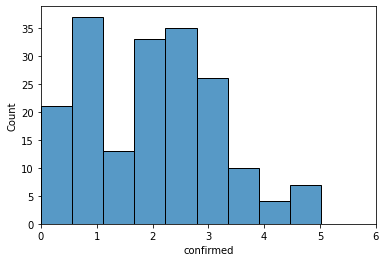

In [44]:
ax = sns.histplot(np.log10(df_country.query('date == "2020-03-27"')['confirmed'] + 1))
ax.set_xlim([0, 6])
ax.set_xticks(np.arange(7))
#_ = ax.set_xticklabels(['0', '10', '100', '1k', '10k', '100k'])

In [45]:
df_top_country = create_top_countries(df_country)
df_top_country_melt = melt_top_country(df_top_country)

In [46]:
df_top_country_melt.head()

country   variable    value
0      US  confirmed  9860308
1   India  confirmed  8507754
2  Brazil  confirmed  5653561
3  Russia  confirmed  1740172
4  France  confirmed  1709773

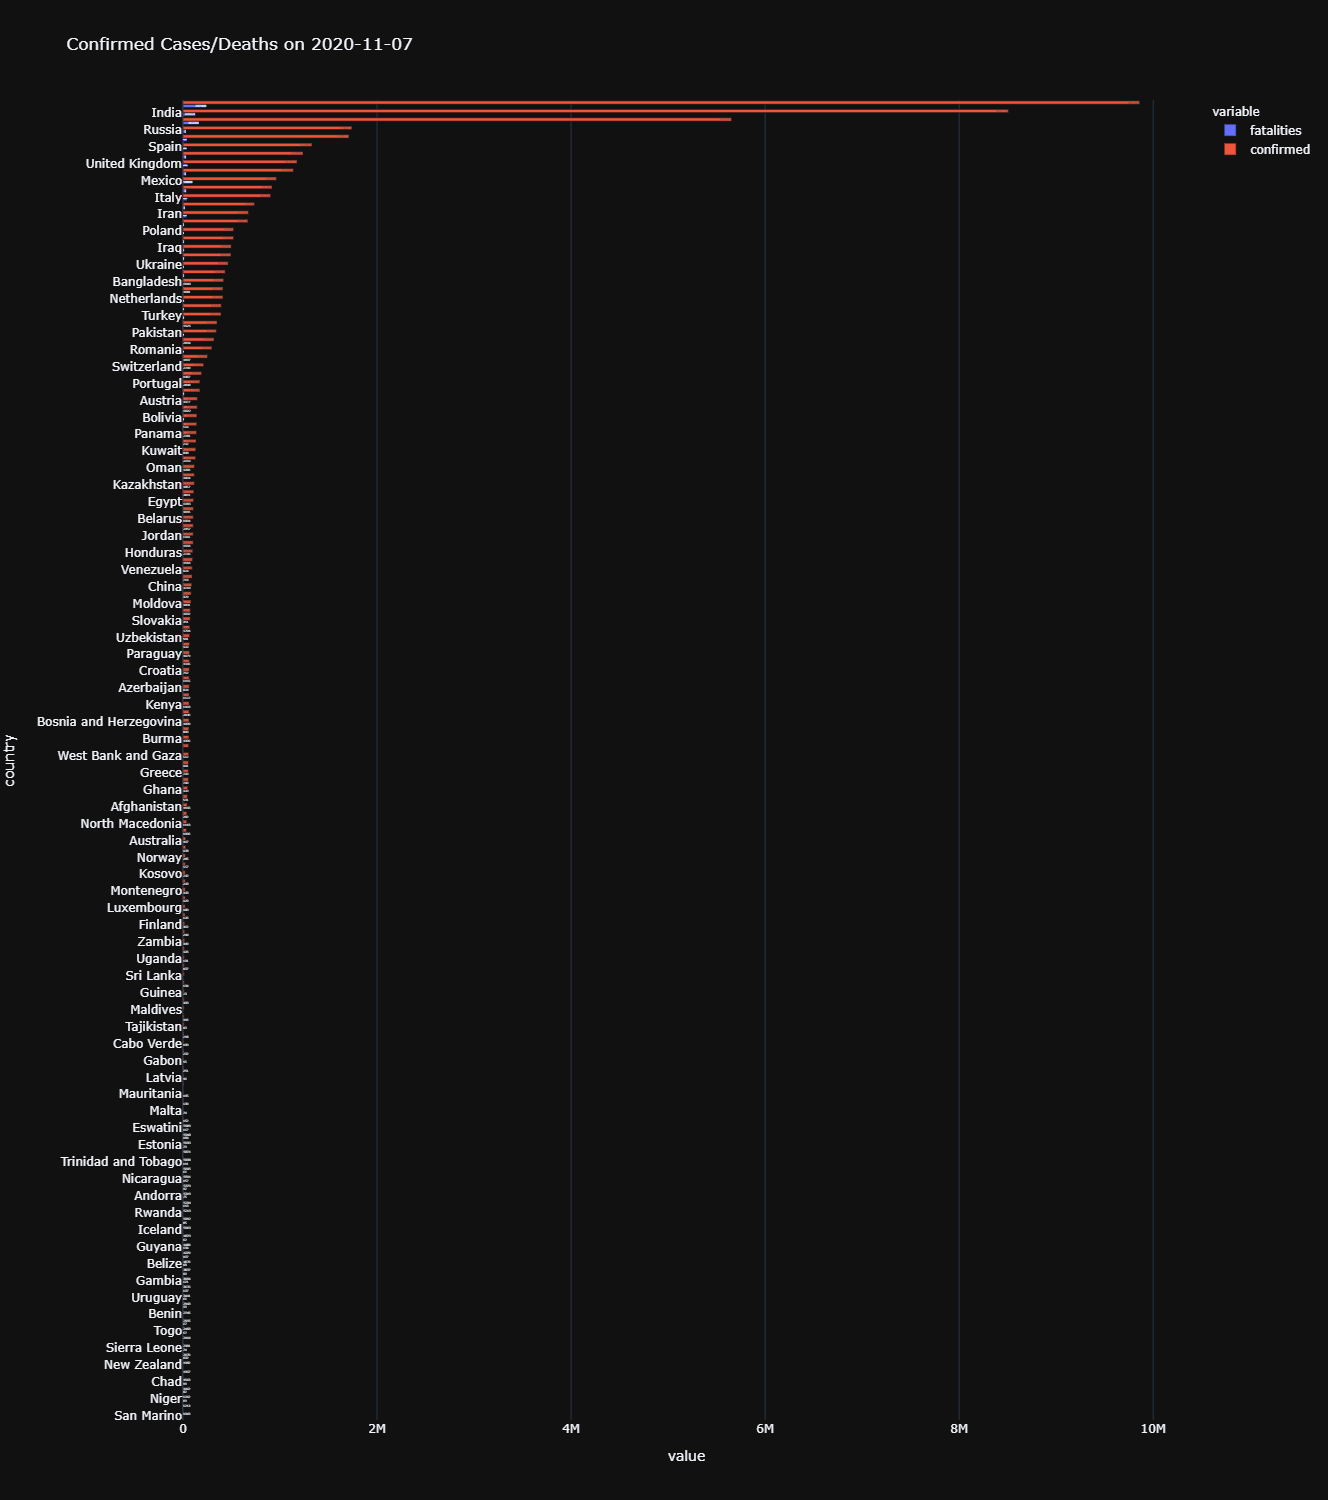

In [47]:
fig = px.bar(df_top_country_melt.iloc[::-1],
    x='value', y='country', color='variable', barmode='group',
    title=f'Confirmed Cases/Deaths on {target_date}', text='value', height=1500, orientation='h')
fig.show()

In [48]:
df_top20_countries_conf = get_topk_countries_conf(df_country, k=20)

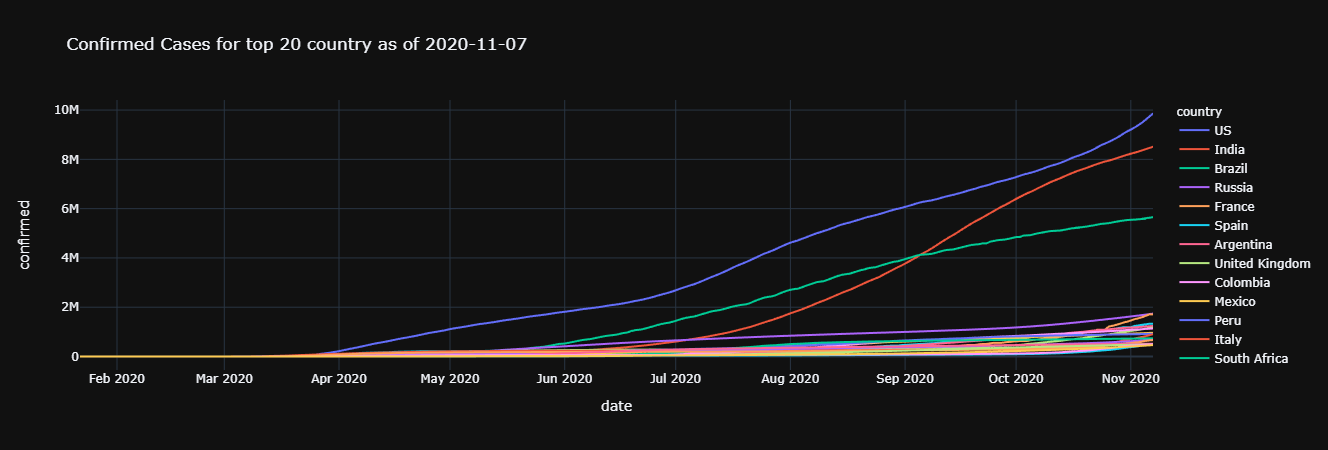

In [49]:
fig = px.line(df_top20_countries_conf,
    x='date', y='confirmed', color='country',
    title=f'Confirmed Cases for top 20 country as of {target_date}')
fig.show()

In [50]:
df_top20_countries_fat = get_topk_countries_fat(df_country, k=20)

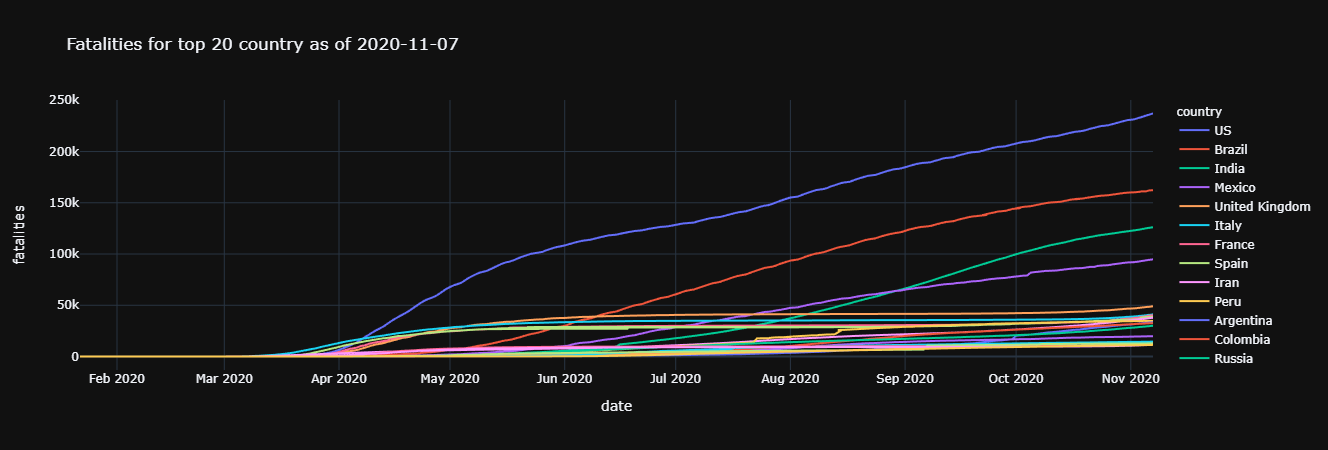

In [51]:
fig = px.line(df_top20_countries_fat,
    x='date', y='fatalities', color='country',
    title=f'Fatalities for top 20 country as of {target_date}')
fig.show()